# 이미지를 numpy 배열로 만들고 저장하기

In [1]:
import pathlib
import os,glob
import numpy as np
from PIL import Image

from sklearn.model_selection import KFold, train_test_split
from tensorflow.keras.utils import to_categorical

# 이미지를 numpy 배열로 만들기

np.random.seed(42)

directory = 'C:/Users/s_csmscox/jupyterSave/dvc/valid'
categories = ["0","1"] # dog = 1, cat = 0
nb_classes = len(categories)

w = 128
h = 128

X = []
y = []

for idx, obj in enumerate(categories):

    image_dir = directory + "/" + obj
    files = glob.glob(image_dir+"/*.jpg")
    print(obj, " 파일 길이 : ", len(files))
    
    for i, f in enumerate(files):
        img = Image.open(f)
        
        # 사이즈 조절
        img = img.resize((w, h))
        
        img = np.asarray(img)
        img = img.reshape(w,h,3)

        X.append(img)
        y.append(idx)

        if i % 10000 == 0:
            print(obj, " : ", f)


0  파일 길이 :  2500
0  :  C:/Users/s_csmscox/jupyterSave/dvc/valid/0\cat.10000.jpg
1  파일 길이 :  2500
1  :  C:/Users/s_csmscox/jupyterSave/dvc/valid/1\dog.10000.jpg


In [2]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

del X
del y

X_train = np.array(X_train)
X_train = X_train/255
np.save("C:/Users/s_csmscox/jupyterSave/dvc/X_train128.npy", X_train)
del X_train

X_test = np.array(X_test)
X_test = X_test/255
np.save("C:/Users/s_csmscox/jupyterSave/dvc/X_test128.npy", X_test)
del X_test

y_train = np.array(y_train)
y_train = to_categorical(y_train)
np.save("C:/Users/s_csmscox/jupyterSave/dvc/y_train.npy", y_train)
del y_train

y_test = np.array(y_test)
y_test = to_categorical(y_test)
np.save("C:/Users/s_csmscox/jupyterSave/dvc/y_test.npy", y_test)
del y_test

# numpy 배열을 불러와서 모델 학습 및 저장

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

np.random.seed(42)

X_train = np.load('C:/Users/s_csmscox/jupyterSave/dvc/X_train128.npy')
y_train = np.load('C:/Users/s_csmscox/jupyterSave/dvc/y_train.npy')

In [7]:
#모델 구축

earlystopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding='same',
                 activation='relu',
                 input_shape=(128, 128, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.summary()
model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy',
                metrics=['accuracy'])


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 128, 128, 32)      896       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 128, 128, 32)      9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 64, 64, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 32, 32, 128)      

In [9]:
history = model.fit(X_train, y_train, epochs=100, verbose=1,
                   validation_split=0.3, batch_size=20, callbacks=[earlystopping])

Epoch 1/100
140/140 [==============================] - 3s 21ms/step - loss: 0.6819 - accuracy: 0.5589 - val_loss: 0.6447 - val_accuracy: 0.6108
Epoch 2/100
140/140 [==============================] - 3s 20ms/step - loss: 0.6022 - accuracy: 0.6811 - val_loss: 0.5622 - val_accuracy: 0.7083
Epoch 3/100
140/140 [==============================] - 3s 19ms/step - loss: 0.5401 - accuracy: 0.7311 - val_loss: 0.5612 - val_accuracy: 0.7050
Epoch 4/100
140/140 [==============================] - 3s 19ms/step - loss: 0.4943 - accuracy: 0.7657 - val_loss: 0.5589 - val_accuracy: 0.7242
Epoch 5/100
140/140 [==============================] - 3s 19ms/step - loss: 0.4364 - accuracy: 0.7975 - val_loss: 0.5482 - val_accuracy: 0.7267
Epoch 6/100
140/140 [==============================] - 3s 19ms/step - loss: 0.4059 - accuracy: 0.8182 - val_loss: 0.5480 - val_accuracy: 0.7358
Epoch 7/100
140/140 [==============================] - 3s 20ms/step - loss: 0.3614 - accuracy: 0.8404 - val_loss: 0.5524 - val_accuracy:

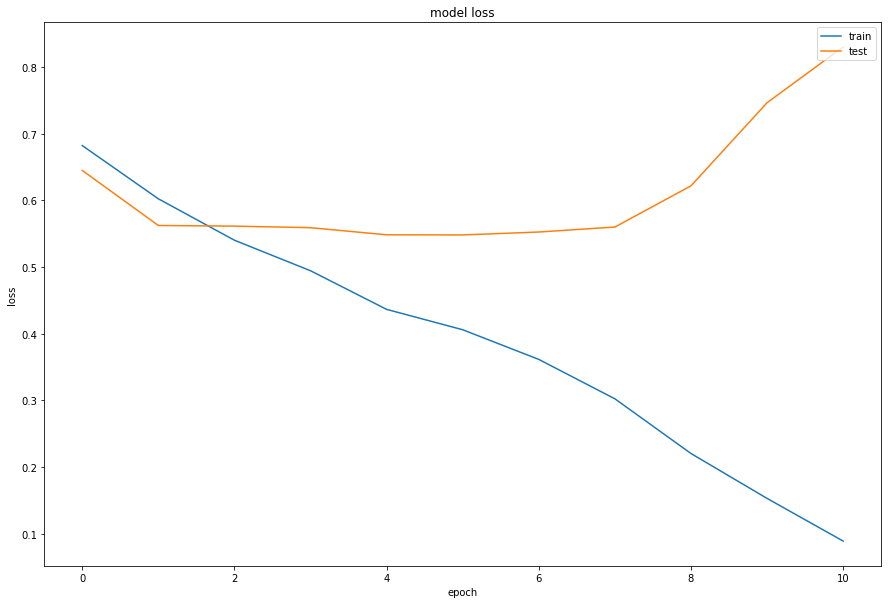

train loss= 0.08902774006128311
validation loss= 0.8298587799072266


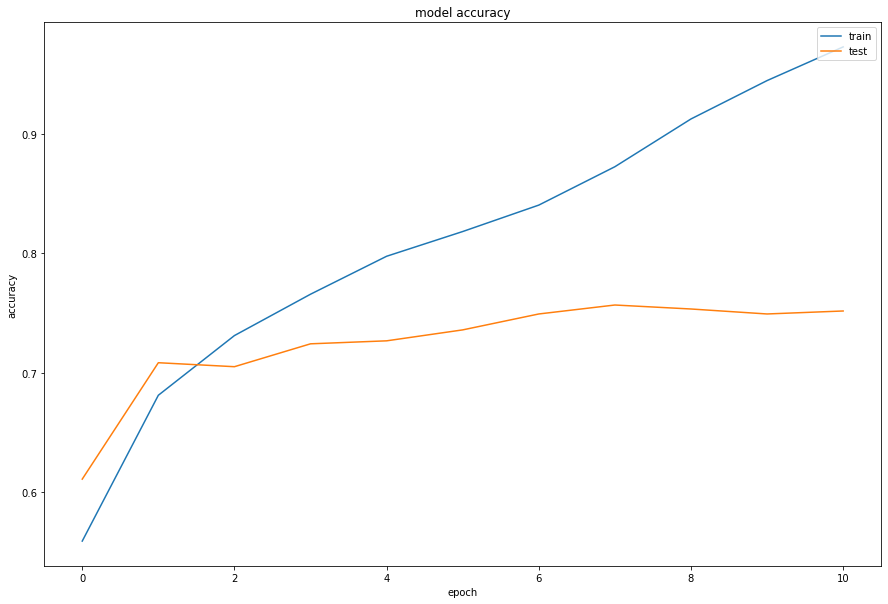

train accuracy= 0.9728571176528931
validation accuracy= 0.7516666650772095


In [10]:
# 학습 곡선을 나타내는 함수
def plot_loss_curve(history):
    plt.figure(figsize=(15, 10))

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper right')
    plt.show()   
    
    print("train loss=", history.history['loss'][-1])
    print("validation loss=", history.history['val_loss'][-1])
    
def plot_acc_curve(history):
    plt.figure(figsize=(15, 10))

    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper right')
    plt.show()   
    
    print("train accuracy=", history.history['accuracy'][-1])
    print("validation accuracy=", history.history['val_accuracy'][-1])
    
plot_loss_curve(history)
plot_acc_curve(history)

# 성능 평가

In [11]:
X_test = np.load('C:/Users/s_csmscox/jupyterSave/dvc/X_test128.npy')
y_test = np.load('C:/Users/s_csmscox/jupyterSave/dvc/y_test.npy')

In [12]:
# 모델 평가
print("-- Evaluate --")
scores = model.evaluate(X_test, y_test)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

-- Evaluate --
32/32 [==============================] - 0s 9ms/step - loss: 0.7757 - accuracy: 0.7560
accuracy: 75.60%


In [13]:
from sklearn.metrics import classification_report

#y_pred와 y_test를 일차원 배열로 만드는 함수
def y_to_list(y_pred, y_test):
    yp = []
    yt = []
    for i in y_pred:
        idx = 0
        m = 0
        for j in range(0,2):
            if(i[j]>m):
                m = i[j]
                idx = j
        yp.append(idx)
    
    for i in y_test:
        idx = 0
        for j in range(0,2):
            if(i[j]==1):
                idx = j
                break
        yt.append(idx)
    
    return yp, yt

#모델 예측 및 classification_report를 통한 평가
y_pred = model.predict(X_test)

yp, yt = y_to_list(y_pred, y_test)

target_names = ['cat', 'dog']
print(classification_report(yt, yp, target_names=target_names))

              precision    recall  f1-score   support

         cat       0.76      0.75      0.76       500
         dog       0.75      0.76      0.76       500

    accuracy                           0.76      1000
   macro avg       0.76      0.76      0.76      1000
weighted avg       0.76      0.76      0.76      1000



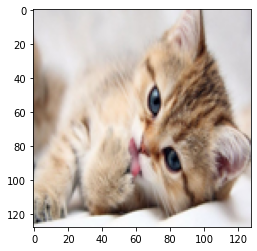

예측 : 고양이


In [15]:
img = Image.open('C:/Users/s_csmscox/jupyterSave/cat.jpg')

img = img.resize((128,128))
        
img = np.asarray(img)
img = img.reshape(128,128,3)

plt.imshow(img)
plt.show()

img = img/255

img = img.reshape(1,128,128,3)
pred = model.predict(img)

for i in pred:
    m = i.max()
    for j in range(2):
        if i[j] == m:
            if j == 0:
                print("예측 : 고양이")
            else:
                print("예측 : 강아지")
